# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Кузьмин Дмитрий, вариант 27.

## Цель работы

Исследование однородного линейного уравнения с периодическими коэффициентами.

## Основные теоретические положения
Линейная однородная система с периодическими коэффициентами имеет вид

$X' = A(t)X, A(t + T) = A(t), t \geq 0$       (1)

$\Phi(t)$ - фундаментальная матрица системы (1), если ее столбцы - линейно независимые решения уравнения (1)

Матрица $C$ называется основной для фундаментальной матрицы $\Phi$, если $\Phi(t + T) = \Phi(t)C, \forall t \geq 0$

Спектральным радиусом матрицы A называется максимум модуля ее собственных чисел

$p(A) = max_{0 \leq j \leq n}|\lambda_j|$


## Постановка задачи
Дано дифференциальное уравнение:

$x^{''} + a(p,t)x = 0$, $a(p,t) = p + b(t)$, $b(t + T) = b(t)$

где $p$ - параметр

Данное уравнение сводится к системе двух уравнений 1-го порядка (1):

$\begin{cases}
      u'_1 = u_2 \\
      u'_2 = -a(p, t)u_1
    \end{cases}$

Здесь $u_1(t) = x(t)$, $u_2(t) = x'(t)$

$b(t) = exp(cos(t))$

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).


## Выполнение работы

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Зафиксируем константы

In [2]:
p_array = np.arange(0.1, 5, 0.05)
v1 = (1, 0)
v2 = (0, 1)
T = 2
interval = [0, T]

Реализуем функцию $r(p)$

1. Внутри определим в зависимости от $p$ функцию, относительно которой решается задача К оши
2. Численно решим две задачи Коши для наборов условий $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$
3. На основе полученных решений сформируем основную матрицу
4. Вычислим собственные числа и найдем спектральный радиус, как максимум из модулей этих чисел
5. Полученный спектральный радиус будет значение $r(p)$

In [7]:
def r_fun(p):
    
    # система
    def dudt(U, t):
        return [U[1], -(p + np.exp(np.cos(t))) * U[0]]
    
    # U(t, V1) и U(t, V2)
    uv1 = odeint(dudt, v1, interval)
    uv2 = odeint(dudt, v2, interval)
    
    # основная матрица
    C = np.matrix([uv1[-1], uv2[-1]]).transpose()
    
    # собственные числа
    eigen_values = np.linalg.eigvals(C)
    
    # спектральный радиус
    r = max(np.abs(eigen_values))
    return r 

Заполним массив для всех значений $p$ и постром график

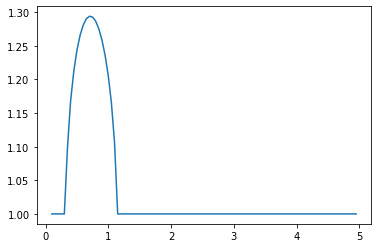

In [8]:
r_array = np.array([r_fun(p) for p in p_array])
plt.plot(p_array, r_array)

Получен график зависимости $r(p)$ 

Система неустойчива там, где $r > 1$ и устойчива там, где $r \leq 1$

## Выводы
В результате выполнения работы были изучены однородные линейные уравнения с периодическими коэффициентами, а также понятие устойчивости. Был построен график, по которому можно определить устойчивость системы